In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
import numpy as np

In [24]:
info = pd.read_csv("/neurospin/dico/data/bv_databases/human/partially_labeled/ACCpatterns/all.csv",index_col=0)
info = info[~info.long_name.isna()]
info = info.sort_values(by="long_name", ignore_index=True)
info

,PERSON_ID,Sujet,name,DATABASE,SEX,HAND,IRM_NAME0,IRM_NAME1,long_name,Left_PCS,...,Inc-coul,TMTA,TMTB,Flex,right_3level,left_2level,right_2level,Asym3_from2,Asym3_from3,Asym2_from2
0,NaN,NaN,03HUBJO,APEX,NaN,NaN,NaN,NaN,1-03HUBJO_t0,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,08ANDTI,APEX,NaN,NaN,NaN,NaN,1-08ANDTI_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,11LEBJO,APEX,NaN,NaN,NaN,NaN,1-11LEBJO_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15LEHMI,APEX,NaN,NaN,NaN,NaN,1-15LEHMI_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,17COLMA,APEX,NaN,NaN,NaN,NaN,1-17COLMA_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,inhibition25,APEX,NaN,NaN,NaN,NaN,sub-inhibition25_ses-pretraining_T1w,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,inhibition26,APEX,NaN,NaN,NaN,NaN,sub-inhibition26_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,inhibition28,APEX,NaN,NaN,NaN,NaN,sub-inhibition28_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,inhibition29,APEX,NaN,NaN,NaN,NaN,sub-inhibition29_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
info.DATABASE

249    APEX
252    APEX
254    APEX
257    APEX
259    APEX
       ... 
241    APEX
244    APEX
246    APEX
247    APEX
237    APEX
Name: DATABASE, Length: 341, dtype: object

In [98]:
apex = info[info.DATABASE == 'APEX']
nimh = info[info.DATABASE.str.contains('NIMH')]
tissier = info[info.DATABASE.str.contains('TISSIER')]

base_dico = {"APEX": 'red', 'NIMH_COS': 'green', 'NIMH_NV': 'green', 'NIMH_COSSIB': 'green', 'TISSIER_2018': 'blue'}

apex

,PERSON_ID,Sujet,name,DATABASE,SEX,HAND,IRM_NAME0,IRM_NAME1,long_name,Left_PCS,...,Inc-coul,TMTA,TMTB,Flex,right_3level,left_2level,right_2level,Asym3_from2,Asym3_from3,Asym2_from2
0,NaN,NaN,03HUBJO,APEX,NaN,NaN,NaN,NaN,1-03HUBJO_t0,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,08ANDTI,APEX,NaN,NaN,NaN,NaN,1-08ANDTI_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,11LEBJO,APEX,NaN,NaN,NaN,NaN,1-11LEBJO_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,15LEHMI,APEX,NaN,NaN,NaN,NaN,1-15LEHMI_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,17COLMA,APEX,NaN,NaN,NaN,NaN,1-17COLMA_t0,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,inhibition25,APEX,NaN,NaN,NaN,NaN,sub-inhibition25_ses-pretraining_T1w,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,inhibition26,APEX,NaN,NaN,NaN,NaN,sub-inhibition26_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,inhibition28,APEX,NaN,NaN,NaN,NaN,sub-inhibition28_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,inhibition29,APEX,NaN,NaN,NaN,NaN,sub-inhibition29_ses-pretraining_T1w,absent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# get subjects with proeminent right PCGS
proems = info[info.right_3level == 'proeminent'].long_name
proems

19    a0001_t1_s03
57    a0039_t1_s03
60    e0021_t1_s03
63    e0036_t1_s03
67    e0045_t1_s03
72    e0051_t1_s03
73    e0053_t1_s03
75    e0059_t1_s03
84    e0069_t1_s04
86    e0071_t1_s03
87    e0072_t1_s03
97    e0082_t1_s03
Name: long_name, dtype: object

In [23]:
embs = pd.read_csv('/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-09-30/17-27-31/cingulate_ACCpatterns_embeddings/full_embeddings.csv')
embs = embs.sort_values(by='ID', ignore_index=True)
embs

,ID,dim1,dim2,dim3,dim4
0,1-03HUBJO_t0,13.746984,6.940231,-8.988678,-0.654266
1,1-08ANDTI_t0,10.039248,3.071566,-23.064545,-7.683618
2,1-11LEBJO_t0,15.008720,1.371084,-23.351560,-6.521302
3,1-15LEHMI_t0,14.159241,4.401712,-15.933049,-19.087380
4,1-17COLMA_t0,4.259211,15.044788,-10.106764,-20.030579
...,...,...,...,...,...
336,sub-inhibition25_ses-pretraining_T1w,6.381626,-4.734384,0.285639,-12.346708
337,sub-inhibition26_ses-pretraining_T1w,-1.740220,-4.981936,-3.523232,-13.342991
338,sub-inhibition28_ses-pretraining_T1w,2.437700,5.695477,-7.293016,-4.273985
339,sub-inhibition29_ses-pretraining_T1w,-2.627184,1.975519,-14.586481,-10.016541


In [30]:
embs['source'] = info.DATABASE
embs['PCGS'] = info.Right_PCS
embs.loc[info.right_3level == 'proeminent', 'PCGS'] = 'proeminent'

embs

,ID,dim1,dim2,dim3,dim4,source,PCGS
0,1-03HUBJO_t0,13.746984,6.940231,-8.988678,-0.654266,APEX,present
1,1-08ANDTI_t0,10.039248,3.071566,-23.064545,-7.683618,APEX,present
2,1-11LEBJO_t0,15.008720,1.371084,-23.351560,-6.521302,APEX,present
3,1-15LEHMI_t0,14.159241,4.401712,-15.933049,-19.087380,APEX,absent
4,1-17COLMA_t0,4.259211,15.044788,-10.106764,-20.030579,APEX,absent
...,...,...,...,...,...,...,...
336,sub-inhibition25_ses-pretraining_T1w,6.381626,-4.734384,0.285639,-12.346708,APEX,present
337,sub-inhibition26_ses-pretraining_T1w,-1.740220,-4.981936,-3.523232,-13.342991,APEX,absent
338,sub-inhibition28_ses-pretraining_T1w,2.437700,5.695477,-7.293016,-4.273985,APEX,absent
339,sub-inhibition29_ses-pretraining_T1w,-2.627184,1.975519,-14.586481,-10.016541,APEX,absent


In [81]:
X4d = embs[['dim1', 'dim2', 'dim3', 'dim4']].values

umap_instance = UMAP()

X2d = umap_instance.fit_transform(X4d)

In [105]:
!pip3 list

Package                                   Version   Editable project location
----------------------------------------- --------- -----------------------------------------------------------------------------------
2022-jchavas-cingulate-inhibitory-control 0.0.1     /neurospin/dico/agaudin/Runs/05_rigourous/2022_jchavas_cingulate_inhibitory_control
absl-py                                   0.15.0
aiohttp                                   3.8.3
aiosignal                                 1.2.0
antlr4-python3-runtime                    4.9.3
astunparse                                1.6.3
async-timeout                             4.0.2
asynctest                                 0.13.0
attrs                                     22.1.0
backcall                                  0.2.0
bounded-pool-executor                     0.0.3
cached-property                           1.5.2
cachetools                                4.2.4
certifi                                   2022.9.24
charset-normalizer 

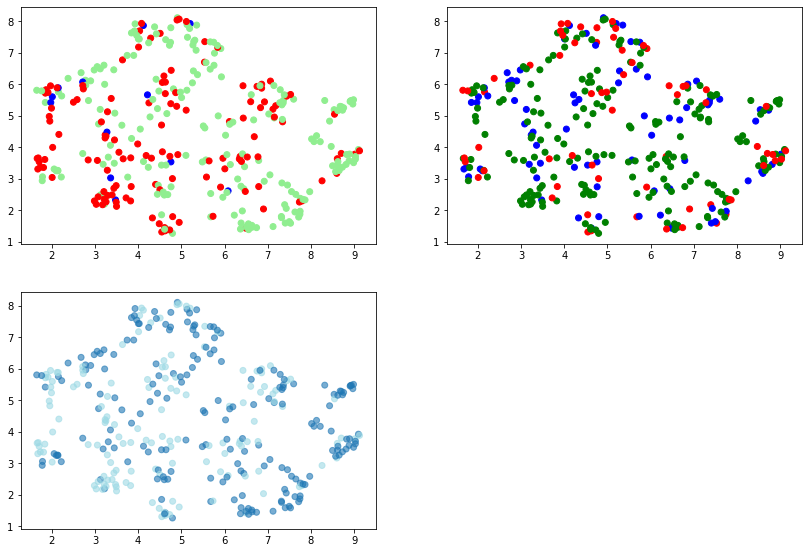

In [110]:
plt.figure(figsize=(14,9.6))
plt.subplot(2,2,1)

color_dico = {'absent': 'lightgreen', 'present': 'red', 'proeminent': 'blue'}
colors1 = embs.PCGS.copy().map(color_dico)
#alphas = 0.5 + 0.5*(colors1 == 'blue')


plt.scatter(X2d[:,0], X2d[:,1], c=colors1)

plt.subplot(2,2,2)

sources = embs.source.copy()
colors2 = sources.map(base_dico)
plt.scatter(X2d[:,0], X2d[:,1], c=colors2, cmap='prism')

plt.subplot(2,2,3)
colors3 = (embs.PCGS != 'absent').astype(int)
plt.scatter(X2d[:,0], X2d[:,1], c=colors3, cmap='tab20', alpha=0.6)

In [103]:
(0.5*(colors1 == 'blue') + 0.5).unique()

array([0.5, 1. ])

In [78]:
paracingulate = embs[(embs.PCGS != 'absent')]
paracingulate

,ID,dim1,dim2,dim3,dim4,source,PCGS
0,1-03HUBJO_t0,13.746984,6.940231,-8.988678,-0.654266,APEX,present
1,1-08ANDTI_t0,10.039248,3.071566,-23.064545,-7.683618,APEX,present
2,1-11LEBJO_t0,15.008720,1.371084,-23.351560,-6.521302,APEX,present
8,1-40AYMJU_t0,13.348683,2.567106,-7.711266,-15.786127,APEX,present
10,2-04HEBTO_t0,6.194181,5.950728,-13.041893,-8.980822,APEX,present
...,...,...,...,...,...,...,...
328,sub-inhibition16_ses-pretraining_T1w,17.241695,9.896313,-11.753173,-2.983172,APEX,present
330,sub-inhibition18_ses-pretraining_T1w,8.915030,3.009636,-10.872553,-3.116958,APEX,present
332,sub-inhibition21_ses-pretraining_T1w,13.422213,-4.946096,-13.673832,-3.483147,APEX,present
333,sub-inhibition22_ses-pretraining_T1w,7.617312,-2.920372,-13.484284,2.523840,APEX,present


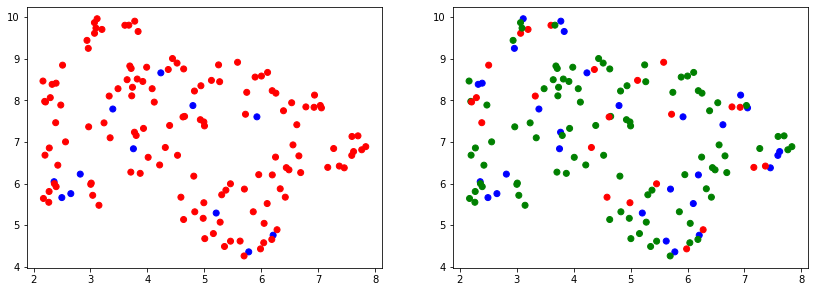

In [111]:
X4d_pcgs = paracingulate[['dim1', 'dim2', 'dim3', 'dim4']].values

umap_instance = UMAP()

X2d_pcgs = umap_instance.fit_transform(X4d_pcgs)


plt.figure(figsize=(14,4.8))
plt.subplot(1,2,1)

color_dico = {'absent': 'lightgreen', 'present': 'red', 'proeminent': 'blue'}
colors1 = paracingulate.PCGS.copy().map(color_dico)

plt.scatter(X2d_pcgs[:,0], X2d_pcgs[:,1], c=colors1)

plt.subplot(1,2,2)

sources = paracingulate.source.copy()
colors2 = sources.map(base_dico)
plt.scatter(X2d_pcgs[:,0], X2d_pcgs[:,1], c=colors2, cmap='prism')

## preds

In [87]:
model_preds = pd.read_csv("/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-09-30/17-27-31/cingulate_ACCpatterns_embeddings/cross_val_predicted_labels.csv")
model_preds

,Subject,label,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,...,predicted_242,predicted_243,predicted_244,predicted_245,predicted_246,predicted_247,predicted_248,predicted_249,median_pred,mean_pred
0,1-03HUBJO_t0,1,0.830164,0.838776,0.890083,0.925888,0.840117,0.827103,0.848114,0.816503,...,0.897290,0.861490,0.820605,0.853469,0.820450,0.843945,0.856171,0.873362,0.857622,0.860126
1,1-08ANDTI_t0,1,0.369626,0.362385,0.457208,0.513366,0.358877,0.315664,0.362087,0.342210,...,0.471584,0.352730,0.354164,0.367566,0.327053,0.368821,0.399516,0.444159,0.383377,0.389815
2,1-11LEBJO_t0,1,0.640910,0.632905,0.723779,0.806229,0.636808,0.585200,0.635810,0.607855,...,0.739270,0.636497,0.610808,0.642388,0.591253,0.632634,0.664966,0.716476,0.657397,0.663796
3,1-15LEHMI_t0,0,0.641753,0.642373,0.716817,0.818855,0.651825,0.585916,0.640340,0.630174,...,0.745380,0.645110,0.625144,0.651645,0.624228,0.684866,0.720035,0.696792,0.684315,0.688985
4,1-17COLMA_t0,0,0.047369,0.066731,0.143638,0.162476,0.048467,0.023104,0.056668,0.056816,...,0.167477,0.048908,0.083121,0.071035,0.068479,0.128598,0.154618,0.098723,0.104503,0.103056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,sub-inhibition25_ses-pretraining_T1w,1,1.067993,1.060506,1.017556,1.045652,1.060995,0.988770,1.058847,1.030168,...,1.068690,1.051355,1.004731,1.065825,1.047341,1.005251,1.056299,0.995413,1.034217,1.034696
337,sub-inhibition26_ses-pretraining_T1w,0,0.595698,0.601336,0.576278,0.582734,0.594495,0.536030,0.587206,0.562864,...,0.601766,0.585679,0.535052,0.606377,0.594043,0.541571,0.580498,0.570606,0.576714,0.575516
338,sub-inhibition28_ses-pretraining_T1w,0,0.339621,0.313370,0.362751,0.290567,0.282609,0.300626,0.293809,0.274625,...,0.331862,0.353803,0.295512,0.345919,0.317102,0.283820,0.330521,0.305747,0.317431,0.317046
339,sub-inhibition29_ses-pretraining_T1w,0,0.064906,0.064122,0.112965,0.022802,0.006882,-0.000426,0.022739,-0.011566,...,0.061805,0.082695,-0.005948,0.098783,0.054150,-0.014580,0.060932,0.046165,0.051455,0.045690


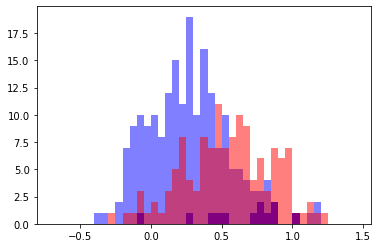

In [125]:
color_dico = {'absent': 'blue', 'present': 'red', 'proeminent': 'purple'}
colors = embs.PCGS.copy()
colors = colors.map(color_dico)

bins = np.arange(-0.7,1.5,0.05)

for key in color_dico.keys():
    alpha = 1 if key == 'proeminent' else 0.5
    plt.hist(model_preds[embs.PCGS == key].median_pred, bins=bins, color=color_dico[key], alpha=alpha)